In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [137]:
df = pd.read_excel('../Q5_data/Q5_train.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           149701 non-null  float64
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159248 non-null  float64
 5   eyesight(left)       149692 non-null  float64
 6   eyesight(right)      159247 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       149701 non-null  float64
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

# preprocessing

In [138]:
# Fill in missing values
df.iloc[:, 5] = df.iloc[:, 5].fillna(df.iloc[:, 6]) # If the data in the left eye is missing, use the data in the right eye to fill it in
df.iloc[:, 6] = df.iloc[:, 6].fillna(df.iloc[:, 5]) # Same for right one
df.iloc[:, 8] = df.iloc[:, 8].fillna(df.iloc[:, 7]) # Same for ear
df.iloc[:, 17] = df.iloc[:, 17].fillna(df.iloc[:, 17].mean()) # Fill in the average of medical indicators
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           149701 non-null  float64
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159248 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  float64
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [139]:
# Use some standard formulas to fill in height and waist circumference
df.iloc[:, 2] = df.iloc[:, 2].fillna(df.iloc[:, 3]/0.9+100)
df.iloc[:, 4] = df.iloc[:, 4].fillna(df.iloc[:, 2]/2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  float64
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  float64
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

# Training model

In [164]:
SEED = np.random.seed(42)

# Extract features and labels
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Divide training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Create model
# model0 = RandomForestClassifier(n_estimators=100)
xgb_params = {'n_estimators': 727, 
              'max_depth': 44, 
              'min_child_weight': 42.394074475465935, 
              'learning_rate': 0.018945904767046495, 
              'subsample': 0.9976305222111156, 
              'gamma': 0.23054785929528437, 
              'colsample_bytree': 0.4156956766282452, 
              'colsample_bylevel': 0.9225226228188033, 
              'colsample_bynode': 0.686558727709571
             }
model1 = XGBClassifier(**xgb_params, random_state=SEED)
model2 = CatBoostClassifier(iterations=900, depth=7, learning_rate=0.1, loss_function='Logloss')
# Train model
# model0.fit(X_train, y_train)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)


# Validate on val set
# y_pred_prob0 = model0.predict_proba(X_test)[:, 1]
y_pred_prob1 = model1.predict_proba(X_val)[:, 1]
y_pred_prob2 = model2.predict_proba(X_val)[:, 1]
y_pred_prob = (y_pred_prob1 + y_pred_prob2)/ 2
# Calculate AUC
auc = roc_auc_score(y_val, y_pred_prob)
print('AUC:', auc)

0:	learn: 0.6440318	total: 11.7ms	remaining: 10.5s
1:	learn: 0.6090729	total: 22.5ms	remaining: 10.1s
2:	learn: 0.5798723	total: 33.6ms	remaining: 10.1s
3:	learn: 0.5581125	total: 43.9ms	remaining: 9.84s
4:	learn: 0.5409606	total: 54.5ms	remaining: 9.76s
5:	learn: 0.5281694	total: 64.7ms	remaining: 9.64s
6:	learn: 0.5174345	total: 74.7ms	remaining: 9.53s
7:	learn: 0.5094295	total: 84ms	remaining: 9.37s
8:	learn: 0.5028053	total: 94.1ms	remaining: 9.31s
9:	learn: 0.4968394	total: 104ms	remaining: 9.22s
10:	learn: 0.4920242	total: 113ms	remaining: 9.13s
11:	learn: 0.4878443	total: 122ms	remaining: 9.04s
12:	learn: 0.4844897	total: 132ms	remaining: 9.01s
13:	learn: 0.4819294	total: 143ms	remaining: 9.02s
14:	learn: 0.4792667	total: 153ms	remaining: 9s
15:	learn: 0.4769071	total: 162ms	remaining: 8.94s
16:	learn: 0.4750422	total: 171ms	remaining: 8.89s
17:	learn: 0.4733198	total: 181ms	remaining: 8.85s
18:	learn: 0.4718181	total: 190ms	remaining: 8.82s
19:	learn: 0.4701652	total: 200ms	rem

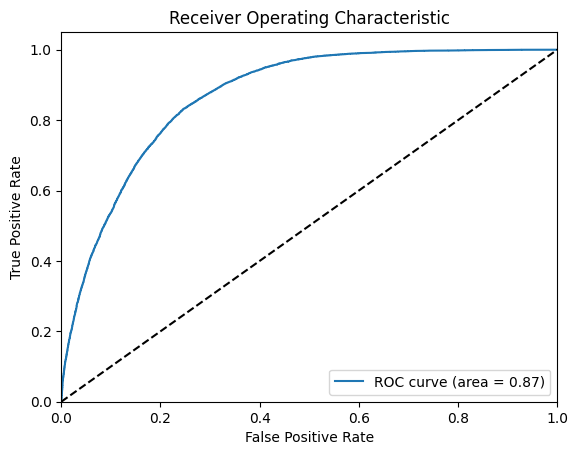

In [165]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
auc = roc_auc_score(y_val, y_pred_prob)
# Draw ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# output

In [166]:
# Check the test data
test_df = pd.read_csv('../Q5_data/Q5_test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [167]:
# Predict on test set
X_test = test_df.iloc[:, 1:]
y_pred_prob1 = model1.predict_proba(X_test)[:, 1]
y_pred_prob2 = model2.predict_proba(X_test)[:, 1]
y_pred_prob = (y_pred_prob1 + y_pred_prob2)/ 2

# Export the csv
test_df['smoking'] = y_pred_prob
output = test_df[['id','smoking']]
output.to_csv('../Q5_output.csv', index=False)